In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from numba import jit

In [2]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n,len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
args = ()
@jit(nopython=True)
def H_Chimera(u,t=0,args = args):
    r1 = u[0]
    r2 = u[1]
    phi = u[2]
    beta,alpha,eta1,eta2 = args
    dr1 = 1/2 * r1* (1-r1**2)*(eta1**2 * r1**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r1*r2*np.cos(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.cos(alpha + 2*phi))
    dr2 = 1/2 * r2* (1-r2**2)*(eta2**2 * r2**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r2*r1*np.cos(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.cos(alpha - 2*phi))
    dpsi1 = -1/2 * (1+r1**2)*(eta1**2 * r1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r1*r2*np.sin(alpha+phi) + beta**2 * eta2**2 * r2**2 * np.sin(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r2**2)*(eta2**2 * r2**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r2*r1*np.sin(alpha-phi) + beta**2 * eta1**2 * r1**2 * np.sin(alpha - 2*phi))
    dphi = dpsi1 - dpsi2
    return np.array([dr1,dr2,dphi])


@jit(nopython=True)
def myFun2(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

def myFun3(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    dr = 1/2 * r* (1-r**2)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/2 * (1+r**2)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

@jit(nopython=True)
def myFun4(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    r = np.abs(r)
    dr = 1/(2 * r)* (1-r**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/(2*r) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])


def myFun5(u,t=0,args = args):
    r = u[0]
    phi = u[1]
    beta,alpha,eta1,eta2 = args
    r = np.abs(r)
    dr = 1/(2 * abs(r))* (1-abs(r)**4)*(eta2**2 * r**2 * np.cos(alpha) + 2 * beta*eta1*eta2*r*np.cos(alpha+phi) + beta**2 * eta1**2 * np.cos(alpha + 2*phi))
    dpsi2 = -1/(2*abs(r)) * (1+r**4)*(eta2**2 * r**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r*np.sin(alpha+phi) + beta**2 * eta1**2 * np.sin(alpha + 2*phi))
    dpsi1 = -1/2 * (2)*(eta1**2 * np.sin(alpha) + 2 * beta*eta1*eta2*r *np.sin(alpha-phi) + beta**2 * eta2**2 * r**2 * np.sin(alpha-2*phi))
    dphi =  dpsi2 - dpsi1
    return np.array([dr,dphi])

In [3]:
alpha = 1.5
beta = 0.6
eta1 = 0.1
eta2 = 0.0


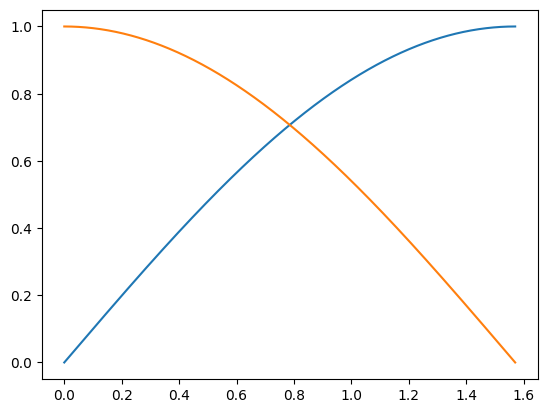

In [7]:
x =  np.linspace(0,np.pi/2, 1000)
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

In [4]:
def r_00(beta,alpha):
    return np.sqrt(-beta**2+2*np.sin(alpha))/beta

def r_0_l(alpha):
    return np.sqrt(np.sin(alpha))

In [5]:
beta_ = np.linspace(0,1,1000)
alpha_ = np.linspace(0,np.pi/2,1000)
AA,BB =  np.meshgrid(alpha_,beta_)
RR = r_00(BB,AA)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_51044/390707092.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-beta**2+2*np.sin(alpha))/beta
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_51044/390707092.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(-beta**2+2*np.sin(alpha))/beta
/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_51044/390707092.py:2: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(-beta**2+2*np.sin(alpha))/beta


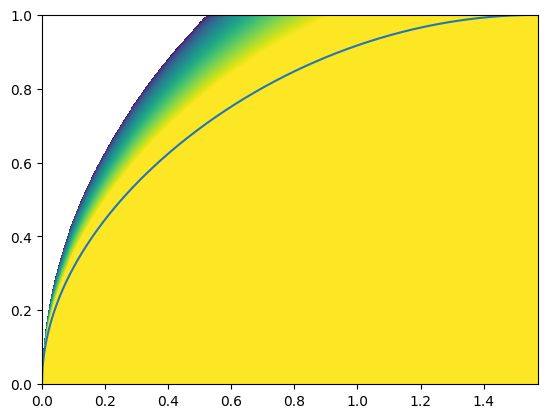

In [6]:
# plt.pcolormesh(AA,BB,RR,vmax=1)
plt.pcolormesh(AA,BB,RR,vmax=np.sqrt(0.6))
plt.plot(alpha_,r_0_l(alpha_))